## <center> Earth's Energy Budget </center>

<img src = 'https://science-edu.larc.nasa.gov/EDDOCS/images/Erb/components2.gif'>

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import netCDF4
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 10

In [2]:
my_example_nc_file = 'pgbh01.gdas.20052010.nc'
fh = Dataset(my_example_nc_file, mode='r')

In [3]:
times = fh.variables['time']
time_np = netCDF4.num2date(times[:],times.units) - pd.offsets.Hour(8)

In [78]:
#print (fh.variables['ULWRF_L1_Avg_1'])
print (fh.variables['USWRF_L1_Avg_1'])

<class 'netCDF4._netCDF4.Variable'>
float32 USWRF_L1_Avg_1(time, lat, lon)
    long_name: Upward shortwave radiation flux
    product_description: 1-hour Average
    units: W m-2
    level: Ground or water surface
    _FillValue: 3.4e+38
    cell_methods: time: mean over hours
unlimited dimensions: time
current shape = (8764, 1, 1)
filling off



In [4]:
variables = {"SHTFL_L1_Avg_1" : "Sensible heat flux",
                 "DSWRF_L1_Avg_1" : "Downward shortwave radiation flux",
                 "CSDSF_L1_Avg_1" : "Clear sky downward solar flux",
                 "DSWRF_L1_Avg_1" : "Downward shortwave radiation flux",
                 "DLWRF_L1_Avg_1" : "Downward longwave radiation flux",
                 "CSULF_L1_Avg_1" : "Clear sky upward longwave flux",
                 "GFLUX_L1_Avg_1" : "Ground heat flux"}

### Clear sky downward solar flux is considered to be equivalent to solar radiation after clouds

In [68]:
downward_solar_flux_np = fh.variables["CSDSF_L1_Avg_1"][:, 0, 0]
cfsr = pd.DataFrame({'datetime': time_np, 'solar rad': downward_solar_flux_np})

In [69]:
cimis = pd.read_pickle('cimis_2005_2010.pkl')

In [71]:
def compare(title):
    plt.plot(cfsr['datetime'][1:], cfsr['solar rad'][1:], label = "cfsr")
    plt.plot(cimis['datetime'][4:][::6], cimis['solar rad'][4:][::6], label = "cimis")
    plt.title(title)
    plt.legend()
    plt.rcParams['figure.figsize'] = 16, 10

## compare CIMIS (measured on earth) with Clear Sky (CFSR)

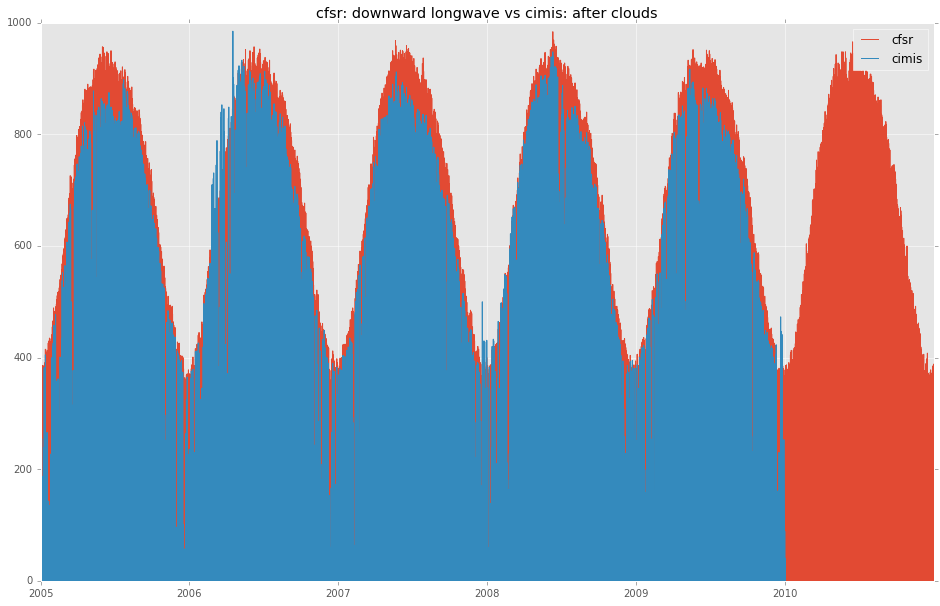

In [72]:
compare('cfsr: downward longwave vs cimis: after clouds')

## Clear sky overestimates the CIMIS data

Why???

- simulation
- locations are different. Distance between two points is 20 - 25 miles.

In [73]:
cfsr['month'] = cfsr.datetime.dt.month
grouped = cfsr.groupby('month').mean()
grouped.reset_index(inplace=True)
cimis['month'] = cimis.datetime.dt.month
grouped2 = cimis.groupby('month').mean()
grouped2.reset_index(inplace=True)

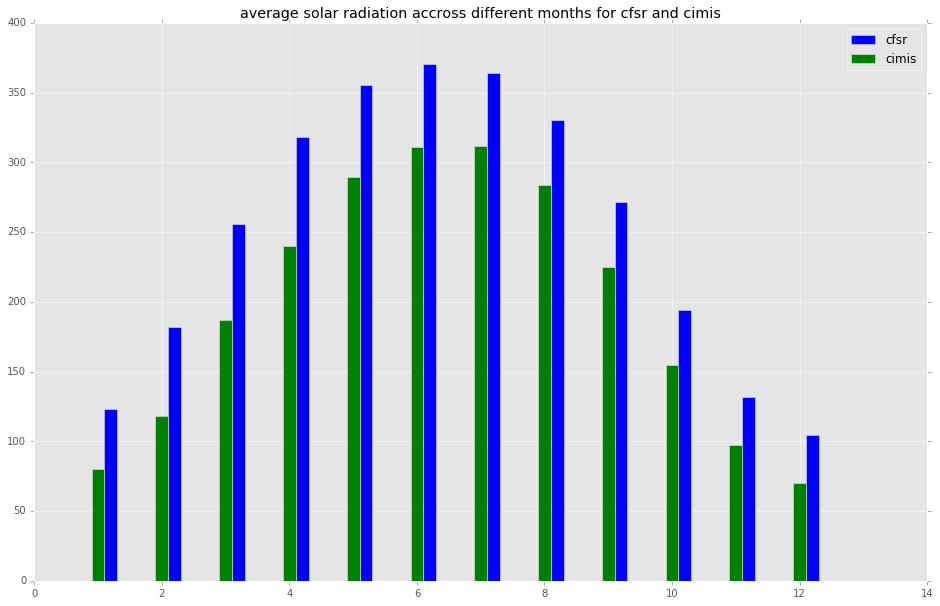

In [74]:
x = grouped['month']
y = grouped['solar rad']
z = grouped2['solar rad']
ax = plt.subplot(111)
ax.bar(x+0.2, y,width=0.2,color='b',align='center')
ax.bar(x, z,width=0.2,color='g',align='center')
ax.legend(['cfsr','cimis'])
plt.title('average solar radiation accross different months for cfsr and cimis')

In [40]:
downward_shortwave = fh.variables['DSWRF_L1_Avg_1'][:, 0, 0]
downward_longwave = fh.variables['DLWRF_L1_Avg_1'][:, 0, 0]
upward_longwave = fh.variables['ULWRF_L1_Avg_1'][:, 0, 0]
upward_shortwave = fh.variables['USWRF_L1_Avg_1'][:, 0, 0]

## Maybe clear sky is after clouds and downward waves are before clouds?

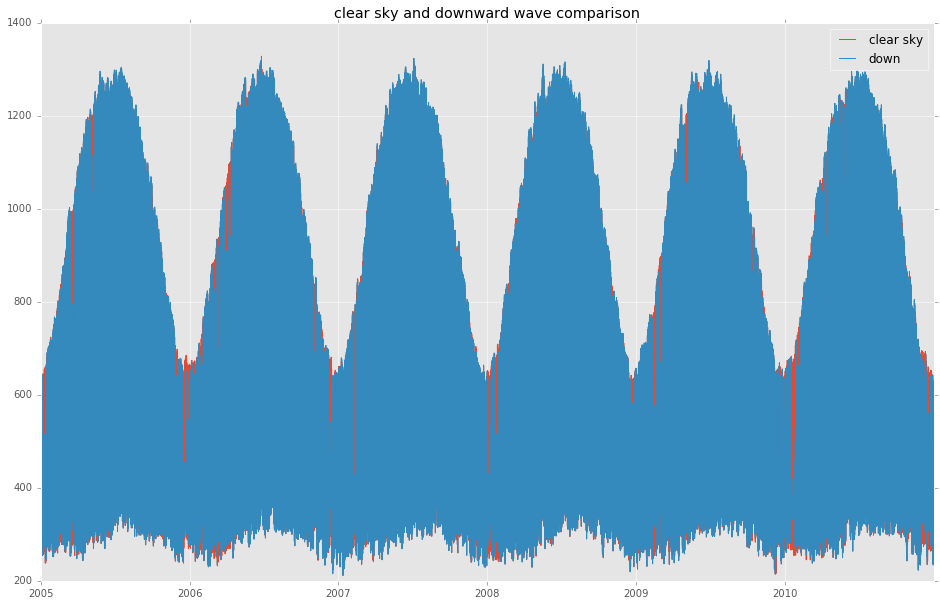

In [75]:
plt.plot(cfsr['datetime'], fh.variables['CSDSF_L1_Avg_1'][:, 0, 0] + fh.variables['CSDLF_L1_Avg_1'][:, 0, 0] , label = "clear sky")
plt.plot(cfsr['datetime'], fh.variables['DSWRF_L1_Avg_1'][:, 0, 0] + fh.variables['DLWRF_L1_Avg_1'][:, 0, 0] , label = "down")
plt.title('clear sky and downward wave comparison')
plt.legend()
plt.rcParams['figure.figsize'] = 16, 10